In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import numpy as np

df = pd.read_csv('data/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
columns = ['Sample_code_number',
           'clump_thickness',
           'Uniformity_of_Cell_Size',
           'Uniformity_of_Cell_Shape',
           'Marginal_Adhesion',
           'Single_Epithelial_Cell_Size',
           'Bare_Nuclei',
           'Bland_Chromatin',
           'Normal_Nucleoli',
           'Mitoses', 
           'Class']  

df.columns = columns
df.set_index('Sample_code_number')
df.head(10)

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import numpy as np

#df = pd.read_csv('data/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
df = pd.read_csv('data/breast-cancer-wisconsin/wdbc.data', header=None)
df = df.iloc[:,:12]
columns = ['ID',
           'Diagnosis',
           'radius',
           'texture',
           'perimeter',
           'area',
           'smoothness',
           'compactness',
           'concavity',
           'concave_points',
           'symmetry',
           'fractal_dim']
df.columns = columns
df = df.set_index('ID')

df.head(10)

,Diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dim
ID,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613
844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742
84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451
844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389


In [165]:
summary_stats = [df.mean(), df.skew(), df.std(), df.var()]
results_df = pd.DataFrame()
results_df['mean'] = df.mean()
results_df['mode'] = df.mode().iloc[0,:]
results_df['skew'] = df.skew()
results_df['std_dev'] = df.std()
results_df['variance'] = df.var()

results_df = results_df.T
display(results_df)

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dim
mean,14.1273,19.2896,91.969,654.889,0.0963603,0.104341,0.0887993,0.0489191,0.181162,0.0627976
mode,12.34,14.93,82.61,512.2,0.1007,0.1147,0,0,0.1601,0.05667
skew,0.94238,0.65045,0.99065,1.64573,0.456324,1.19012,1.40118,1.17118,0.725609,1.30449
std_dev,3.52405,4.30104,24.299,351.914,0.0140641,0.0528128,0.0797198,0.0388028,0.0274143,0.00706036
variance,12.4189,18.4989,590.44,123844,0.0001978,0.00278919,0.00635525,0.00150566,0.000751543,4.98487e-05


# Correlation of features

The pearson correlation for each feature was computed below:

In [169]:
correlations = df.drop('Diagnosis', 1).corr(method='pearson')
display(correlations)

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dim
radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave_points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal_dim,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


In [170]:
correlations_flat = correlations.where(np.triu(np.ones(correlations.shape)).astype(np.bool))
correlations_flat = correlations_flat.stack().reset_index()
correlations_flat.columns = ['row', 'col', 'value']
correlations_flat.loc[correlations_flat['row'] == correlations_flat['col'], 'value'] = np.nan
correlations_flat = correlations_flat.sort_values(by=['value'], ascending=False).dropna()
display(correlations_flat)

,row,col,value
2,radius,perimeter,0.997855
3,radius,area,0.987357
20,perimeter,area,0.986507
46,concavity,concave_points,0.921391
41,compactness,concavity,0.883121
24,perimeter,concave_points,0.850977
42,compactness,concave_points,0.831135
31,area,concave_points,0.823269
7,radius,concave_points,0.822529
23,perimeter,concavity,0.716136


We can see that "Uniformity of cell size" and "Uniformity of cell shape" have a high positive correlation between them. This means that both values tend to trend together.

,Diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dim
ID,,,,,,,,,,,
8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,0.05766
8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,0.06811
8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,0.06905
854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,0.05863
85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,0.06503


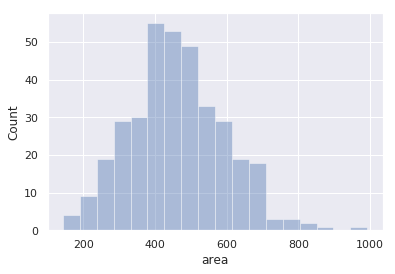

In [176]:
sns.set()
benign = df.loc[df['Diagnosis'] == 'B']
display(benign.head())
data = benign['area']
n_bins = int(np.sqrt(len(data)))
ax = sns.distplot(data, kde=False, bins=n_bins)
ax.set(ylabel ='Count')
plt.show()

,Diagnosis,radius,texture,perimeter,area,smoothness,compactness,concavity,concave_points,symmetry,fractal_dim
ID,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


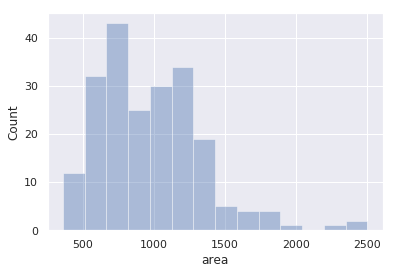

In [177]:
malignant = df.loc[df['Diagnosis'] == 'M']
display(malignant.head())
data = malignant['area']

n_bins = int(np.sqrt(len(data)))
ax = sns.distplot(data, kde=False, bins=n_bins)
ax.set(ylabel ='Count')
plt.show()
